In [1]:
# Data reading 
import pandas as pd 

# Array math 
import numpy as np

# Dates 
import datetime

# Ploting 
import matplotlib.pyplot as plt 

# Deep learning
import tensorflow as tf 

# Keras API 
from tensorflow import keras

# Deep learning 
from keras.models import Input, Model
from keras.layers import Dense, Dropout
from keras import losses

In [2]:
# Downloading data 
!python3 dataDownload.py

# Creating tidy data
!python3 createTidyData.py

Read municipality data in 0.38 seconds
Rows read: 13853
Read patient data in 0.61 seconds
Rows read: 34758
Data saved in data/2020-11-16


In [3]:
# Reading the data 
d = pd.read_csv('data/tidy_data.csv')

# Sorting by date 
d['day'] = [datetime.datetime.strptime(x, '%Y-%m-%d').date() for x in d['day']]
d.sort_values('day', inplace=True)

In [4]:
# Saving the last row for prediction 
xtest = d.iloc[-1]

In [5]:
# Extracting the Y column
Y = d['is_covid'].values.tolist()

# Lagging all the data 
d = d.shift(1)
d['Y'] = Y

# Droping the first row 
d = d.drop(0)
d.reset_index(inplace=True, drop=True)

In [6]:
# Defining how many last day data to use in validation 
n_last = 5

# Spliting to training and validation sets 
validation = d.tail(n_last)
train = d[~d.index.isin(validation.index)]

In [7]:
# Creating X and Y matrices for deep learning 
X, Y = train.drop(['day', 'Y'], axis=1), train['Y']
Xval, Yval = validation.drop(['day', 'Y'], axis=1), validation['Y']

In [8]:
print(f'Input dimension: {X.shape}')

Input dimension: (244, 102)


In [9]:
X.tail()

,is_covid,is_cured-0-9Moteris,is_cured-0-9Vyras,is_cured-10-19Moteris,is_cured-10-19Vyras,is_cured-100-109Moteris,is_cured-100-109Vyras,is_cured-120-129Moteris,is_cured-20-29Moteris,is_cured-20-29Vyras,...,is_treated-90-99Vyras,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7,tests_total,is_quarantine
239,995.0,3.0,2.0,0.0,3.0,0.0,0.0,0.0,9.0,8.0,...,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12002.0,1.0
240,1655.0,1.0,2.0,1.0,3.0,0.0,0.0,0.0,6.0,8.0,...,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12294.0,1.0
241,1941.0,1.0,0.0,4.0,1.0,0.0,0.0,0.0,2.0,5.0,...,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,14445.0,1.0
242,1975.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,...,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10574.0,1.0
243,1036.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6570.0,1.0


In [10]:
Y.tail()

239    1655
240    1941
241    1975
242    1036
243    1109
Name: Y, dtype: int64

In [11]:
# Input shape
inputRegression = Input(shape=(X.shape[1], ))

# Adding one output linear neuron
neuron = Dense(1, activation='linear')(inputRegression)

# Defining the model
model = Model(inputRegression, neuron)

In [12]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 102)]             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 103       
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Initiating the optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.0001)

# Compiling the model
model.compile(loss=losses.MeanAbsoluteError(), optimizer=optimizer)

# Fitting the model
history = model.fit(X, Y, epochs = 1500, batch_size=32, validation_data=(Xval, Yval))

Epoch 1/1500
8/8 [==============================] - 0s 11ms/step - loss: 393.1590 - val_loss: 404.9656
Epoch 2/1500
8/8 [==============================] - 0s 2ms/step - loss: 390.3413 - val_loss: 414.2190
Epoch 3/1500
8/8 [==============================] - 0s 2ms/step - loss: 387.6356 - val_loss: 423.8359
Epoch 4/1500
8/8 [==============================] - 0s 3ms/step - loss: 384.9448 - val_loss: 433.7857
Epoch 5/1500
8/8 [==============================] - 0s 2ms/step - loss: 382.1192 - val_loss: 443.2776
Epoch 6/1500
8/8 [==============================] - 0s 2ms/step - loss: 379.4421 - val_loss: 453.1030
Epoch 7/1500
8/8 [==============================] - 0s 2ms/step - loss: 376.7922 - val_loss: 462.5509
Epoch 8/1500
8/8 [==============================] - 0s 2ms/step - loss: 373.9906 - val_loss: 471.4124
Epoch 9/1500
8/8 [==============================] - 0s 2ms/step - loss: 371.3518 - val_loss: 480.9796
Epoch 10/1500
8/8 [==============================] - 0s 2ms/step - loss: 368.6016

8/8 [==============================] - 0s 2ms/step - loss: 205.2002 - val_loss: 1040.1279
Epoch 81/1500
8/8 [==============================] - 0s 2ms/step - loss: 203.2745 - val_loss: 1047.3655
Epoch 82/1500
8/8 [==============================] - 0s 2ms/step - loss: 201.2648 - val_loss: 1054.1855
Epoch 83/1500
8/8 [==============================] - 0s 2ms/step - loss: 199.3053 - val_loss: 1060.6578
Epoch 84/1500
8/8 [==============================] - 0s 2ms/step - loss: 197.2577 - val_loss: 1067.0333
Epoch 85/1500
8/8 [==============================] - 0s 2ms/step - loss: 195.4318 - val_loss: 1073.8768
Epoch 86/1500
8/8 [==============================] - 0s 3ms/step - loss: 193.3917 - val_loss: 1080.4180
Epoch 87/1500
8/8 [==============================] - 0s 3ms/step - loss: 191.4492 - val_loss: 1086.7705
Epoch 88/1500
8/8 [==============================] - 0s 2ms/step - loss: 189.5216 - val_loss: 1093.5557
Epoch 89/1500
8/8 [==============================] - 0s 2ms/step - loss: 187.5

8/8 [==============================] - 0s 3ms/step - loss: 105.3700 - val_loss: 1384.7351
Epoch 159/1500
8/8 [==============================] - 0s 3ms/step - loss: 104.9997 - val_loss: 1385.2545
Epoch 160/1500
8/8 [==============================] - 0s 2ms/step - loss: 104.6234 - val_loss: 1385.8083
Epoch 161/1500
8/8 [==============================] - 0s 2ms/step - loss: 104.2556 - val_loss: 1386.8379
Epoch 162/1500
8/8 [==============================] - 0s 2ms/step - loss: 103.8810 - val_loss: 1387.8840
Epoch 163/1500
8/8 [==============================] - 0s 2ms/step - loss: 103.4835 - val_loss: 1388.5946
Epoch 164/1500
8/8 [==============================] - 0s 2ms/step - loss: 103.1349 - val_loss: 1389.2346
Epoch 165/1500
8/8 [==============================] - 0s 3ms/step - loss: 102.7875 - val_loss: 1389.6885
Epoch 166/1500
8/8 [==============================] - 0s 2ms/step - loss: 102.4512 - val_loss: 1390.0027
Epoch 167/1500
8/8 [==============================] - 0s 2ms/step - lo

Epoch 237/1500
8/8 [==============================] - 0s 2ms/step - loss: 89.2896 - val_loss: 1275.4486
Epoch 238/1500
8/8 [==============================] - 0s 3ms/step - loss: 89.1444 - val_loss: 1273.9578
Epoch 239/1500
8/8 [==============================] - 0s 3ms/step - loss: 88.9908 - val_loss: 1272.2053
Epoch 240/1500
8/8 [==============================] - 0s 2ms/step - loss: 88.8567 - val_loss: 1269.3885
Epoch 241/1500
8/8 [==============================] - 0s 3ms/step - loss: 88.6875 - val_loss: 1267.4031
Epoch 242/1500
8/8 [==============================] - 0s 2ms/step - loss: 88.5500 - val_loss: 1264.8569
Epoch 243/1500
8/8 [==============================] - 0s 2ms/step - loss: 88.4062 - val_loss: 1263.2727
Epoch 244/1500
8/8 [==============================] - 0s 2ms/step - loss: 88.2520 - val_loss: 1260.5768
Epoch 245/1500
8/8 [==============================] - 0s 3ms/step - loss: 88.1028 - val_loss: 1257.8729
Epoch 246/1500
8/8 [==============================] - 0s 3ms/ste

Epoch 316/1500
8/8 [==============================] - 0s 2ms/step - loss: 77.9771 - val_loss: 1106.2419
Epoch 317/1500
8/8 [==============================] - 0s 2ms/step - loss: 77.8253 - val_loss: 1104.7676
Epoch 318/1500
8/8 [==============================] - 0s 3ms/step - loss: 77.6984 - val_loss: 1102.9974
Epoch 319/1500
8/8 [==============================] - 0s 2ms/step - loss: 77.5589 - val_loss: 1101.5524
Epoch 320/1500
8/8 [==============================] - 0s 2ms/step - loss: 77.4214 - val_loss: 1098.8191
Epoch 321/1500
8/8 [==============================] - 0s 2ms/step - loss: 77.2751 - val_loss: 1096.8204
Epoch 322/1500
8/8 [==============================] - 0s 2ms/step - loss: 77.1531 - val_loss: 1094.1550
Epoch 323/1500
8/8 [==============================] - 0s 2ms/step - loss: 77.0080 - val_loss: 1092.6669
Epoch 324/1500
8/8 [==============================] - 0s 3ms/step - loss: 76.8649 - val_loss: 1090.2029
Epoch 325/1500
8/8 [==============================] - 0s 2ms/ste

8/8 [==============================] - 0s 2ms/step - loss: 67.2154 - val_loss: 944.5213
Epoch 396/1500
8/8 [==============================] - 0s 2ms/step - loss: 67.0841 - val_loss: 942.4893
Epoch 397/1500
8/8 [==============================] - 0s 2ms/step - loss: 66.9536 - val_loss: 940.0055
Epoch 398/1500
8/8 [==============================] - 0s 2ms/step - loss: 66.8165 - val_loss: 938.0672
Epoch 399/1500
8/8 [==============================] - 0s 3ms/step - loss: 66.6830 - val_loss: 936.2814
Epoch 400/1500
8/8 [==============================] - 0s 2ms/step - loss: 66.5537 - val_loss: 933.8105
Epoch 401/1500
8/8 [==============================] - 0s 3ms/step - loss: 66.4160 - val_loss: 932.3362
Epoch 402/1500
8/8 [==============================] - 0s 2ms/step - loss: 66.2735 - val_loss: 930.8005
Epoch 403/1500
8/8 [==============================] - 0s 2ms/step - loss: 66.1614 - val_loss: 928.4494
Epoch 404/1500
8/8 [==============================] - 0s 3ms/step - loss: 66.0126 - val_

8/8 [==============================] - 0s 2ms/step - loss: 56.7405 - val_loss: 783.0234
Epoch 475/1500
8/8 [==============================] - 0s 2ms/step - loss: 56.6177 - val_loss: 780.5139
Epoch 476/1500
8/8 [==============================] - 0s 3ms/step - loss: 56.4709 - val_loss: 779.2878
Epoch 477/1500
8/8 [==============================] - 0s 2ms/step - loss: 56.3426 - val_loss: 777.4048
Epoch 478/1500
8/8 [==============================] - 0s 3ms/step - loss: 56.2214 - val_loss: 775.2094
Epoch 479/1500
8/8 [==============================] - 0s 2ms/step - loss: 56.0969 - val_loss: 774.1786
Epoch 480/1500
8/8 [==============================] - 0s 2ms/step - loss: 55.9734 - val_loss: 772.0554
Epoch 481/1500
8/8 [==============================] - 0s 2ms/step - loss: 55.8250 - val_loss: 768.9772
Epoch 482/1500
8/8 [==============================] - 0s 2ms/step - loss: 55.7019 - val_loss: 767.4425
Epoch 483/1500
8/8 [==============================] - 0s 2ms/step - loss: 55.5765 - val_

8/8 [==============================] - 0s 3ms/step - loss: 49.4164 - val_loss: 658.3004
Epoch 554/1500
8/8 [==============================] - 0s 2ms/step - loss: 49.3751 - val_loss: 654.7337
Epoch 555/1500
8/8 [==============================] - 0s 2ms/step - loss: 49.2381 - val_loss: 653.1104
Epoch 556/1500
8/8 [==============================] - 0s 2ms/step - loss: 49.1853 - val_loss: 651.3556
Epoch 557/1500
8/8 [==============================] - 0s 2ms/step - loss: 49.1106 - val_loss: 649.4373
Epoch 558/1500
8/8 [==============================] - 0s 2ms/step - loss: 49.0021 - val_loss: 649.9855
Epoch 559/1500
8/8 [==============================] - 0s 2ms/step - loss: 48.9268 - val_loss: 648.7410
Epoch 560/1500
8/8 [==============================] - 0s 2ms/step - loss: 48.8598 - val_loss: 647.0324
Epoch 561/1500
8/8 [==============================] - 0s 2ms/step - loss: 48.7701 - val_loss: 646.2857
Epoch 562/1500
8/8 [==============================] - 0s 2ms/step - loss: 48.7035 - val_

8/8 [==============================] - 0s 2ms/step - loss: 43.0915 - val_loss: 529.9601
Epoch 633/1500
8/8 [==============================] - 0s 3ms/step - loss: 43.0097 - val_loss: 527.6232
Epoch 634/1500
8/8 [==============================] - 0s 3ms/step - loss: 42.9344 - val_loss: 525.9651
Epoch 635/1500
8/8 [==============================] - 0s 2ms/step - loss: 42.8527 - val_loss: 523.5527
Epoch 636/1500
8/8 [==============================] - 0s 2ms/step - loss: 42.7636 - val_loss: 522.3679
Epoch 637/1500
8/8 [==============================] - 0s 2ms/step - loss: 42.6930 - val_loss: 520.0167
Epoch 638/1500
8/8 [==============================] - 0s 2ms/step - loss: 42.6116 - val_loss: 518.3448
Epoch 639/1500
8/8 [==============================] - 0s 2ms/step - loss: 42.5318 - val_loss: 516.4838
Epoch 640/1500
8/8 [==============================] - 0s 3ms/step - loss: 42.4695 - val_loss: 516.4515
Epoch 641/1500
8/8 [==============================] - 0s 2ms/step - loss: 42.3716 - val_

8/8 [==============================] - 0s 2ms/step - loss: 37.5248 - val_loss: 437.1777
Epoch 712/1500
8/8 [==============================] - 0s 2ms/step - loss: 37.4763 - val_loss: 436.3250
Epoch 713/1500
8/8 [==============================] - 0s 3ms/step - loss: 37.4123 - val_loss: 435.9203
Epoch 714/1500
8/8 [==============================] - 0s 2ms/step - loss: 37.3469 - val_loss: 435.3194
Epoch 715/1500
8/8 [==============================] - 0s 3ms/step - loss: 37.2966 - val_loss: 434.8222
Epoch 716/1500
8/8 [==============================] - 0s 2ms/step - loss: 37.2380 - val_loss: 434.6691
Epoch 717/1500
8/8 [==============================] - 0s 2ms/step - loss: 37.2023 - val_loss: 434.6078
Epoch 718/1500
8/8 [==============================] - 0s 2ms/step - loss: 37.0958 - val_loss: 433.3460
Epoch 719/1500
8/8 [==============================] - 0s 3ms/step - loss: 37.0347 - val_loss: 431.5692
Epoch 720/1500
8/8 [==============================] - 0s 3ms/step - loss: 36.9821 - val_

8/8 [==============================] - 0s 2ms/step - loss: 33.9545 - val_loss: 391.9752
Epoch 791/1500
8/8 [==============================] - 0s 2ms/step - loss: 33.9269 - val_loss: 391.5965
Epoch 792/1500
8/8 [==============================] - 0s 3ms/step - loss: 33.9245 - val_loss: 390.4249
Epoch 793/1500
8/8 [==============================] - 0s 2ms/step - loss: 33.8553 - val_loss: 390.6723
Epoch 794/1500
8/8 [==============================] - 0s 2ms/step - loss: 33.8354 - val_loss: 389.9564
Epoch 795/1500
8/8 [==============================] - 0s 3ms/step - loss: 33.7934 - val_loss: 389.7004
Epoch 796/1500
8/8 [==============================] - 0s 3ms/step - loss: 33.7573 - val_loss: 389.0028
Epoch 797/1500
8/8 [==============================] - 0s 3ms/step - loss: 33.7467 - val_loss: 389.0502
Epoch 798/1500
8/8 [==============================] - 0s 2ms/step - loss: 33.6868 - val_loss: 387.9810
Epoch 799/1500
8/8 [==============================] - 0s 2ms/step - loss: 33.7099 - val_

8/8 [==============================] - 0s 2ms/step - loss: 31.4094 - val_loss: 352.4625
Epoch 870/1500
8/8 [==============================] - 0s 2ms/step - loss: 31.3916 - val_loss: 352.4520
Epoch 871/1500
8/8 [==============================] - 0s 3ms/step - loss: 31.3742 - val_loss: 352.4135
Epoch 872/1500
8/8 [==============================] - 0s 3ms/step - loss: 31.3626 - val_loss: 352.3629
Epoch 873/1500
8/8 [==============================] - 0s 2ms/step - loss: 31.3517 - val_loss: 352.3227
Epoch 874/1500
8/8 [==============================] - 0s 2ms/step - loss: 31.3198 - val_loss: 352.3245
Epoch 875/1500
8/8 [==============================] - 0s 2ms/step - loss: 31.3222 - val_loss: 352.3183
Epoch 876/1500
8/8 [==============================] - 0s 3ms/step - loss: 31.2898 - val_loss: 352.1459
Epoch 877/1500
8/8 [==============================] - 0s 2ms/step - loss: 31.2641 - val_loss: 352.0751
Epoch 878/1500
8/8 [==============================] - 0s 2ms/step - loss: 31.2554 - val_

8/8 [==============================] - 0s 2ms/step - loss: 29.8798 - val_loss: 347.8835
Epoch 949/1500
8/8 [==============================] - 0s 3ms/step - loss: 29.8637 - val_loss: 347.9155
Epoch 950/1500
8/8 [==============================] - 0s 2ms/step - loss: 29.8698 - val_loss: 347.7140
Epoch 951/1500
8/8 [==============================] - 0s 2ms/step - loss: 29.8196 - val_loss: 347.7789
Epoch 952/1500
8/8 [==============================] - 0s 3ms/step - loss: 29.7982 - val_loss: 347.6662
Epoch 953/1500
8/8 [==============================] - 0s 2ms/step - loss: 29.7727 - val_loss: 347.6688
Epoch 954/1500
8/8 [==============================] - 0s 2ms/step - loss: 29.7727 - val_loss: 347.6947
Epoch 955/1500
8/8 [==============================] - 0s 2ms/step - loss: 29.7560 - val_loss: 347.4669
Epoch 956/1500
8/8 [==============================] - 0s 3ms/step - loss: 29.7154 - val_loss: 347.4550
Epoch 957/1500
8/8 [==============================] - 0s 2ms/step - loss: 29.6903 - val_

8/8 [==============================] - 0s 3ms/step - loss: 28.8347 - val_loss: 344.2490
Epoch 1028/1500
8/8 [==============================] - 0s 2ms/step - loss: 28.8371 - val_loss: 344.1402
Epoch 1029/1500
8/8 [==============================] - 0s 3ms/step - loss: 28.8195 - val_loss: 344.1284
Epoch 1030/1500
8/8 [==============================] - 0s 3ms/step - loss: 28.8013 - val_loss: 344.2140
Epoch 1031/1500
8/8 [==============================] - 0s 2ms/step - loss: 28.8006 - val_loss: 344.1407
Epoch 1032/1500
8/8 [==============================] - 0s 3ms/step - loss: 28.7891 - val_loss: 344.0717
Epoch 1033/1500
8/8 [==============================] - 0s 2ms/step - loss: 28.7800 - val_loss: 343.9510
Epoch 1034/1500
8/8 [==============================] - 0s 2ms/step - loss: 28.7703 - val_loss: 343.9855
Epoch 1035/1500
8/8 [==============================] - 0s 2ms/step - loss: 28.7671 - val_loss: 343.8244
Epoch 1036/1500
8/8 [==============================] - 0s 2ms/step - loss: 28.75

Epoch 1106/1500
8/8 [==============================] - 0s 2ms/step - loss: 28.1647 - val_loss: 341.1674
Epoch 1107/1500
8/8 [==============================] - 0s 2ms/step - loss: 28.1613 - val_loss: 341.0239
Epoch 1108/1500
8/8 [==============================] - 0s 2ms/step - loss: 28.1459 - val_loss: 341.0150
Epoch 1109/1500
8/8 [==============================] - 0s 2ms/step - loss: 28.1396 - val_loss: 341.0707
Epoch 1110/1500
8/8 [==============================] - 0s 3ms/step - loss: 28.1385 - val_loss: 341.0389
Epoch 1111/1500
8/8 [==============================] - 0s 2ms/step - loss: 28.1247 - val_loss: 340.9372
Epoch 1112/1500
8/8 [==============================] - 0s 3ms/step - loss: 28.1657 - val_loss: 341.0027
Epoch 1113/1500
8/8 [==============================] - 0s 2ms/step - loss: 28.2327 - val_loss: 340.7235
Epoch 1114/1500
8/8 [==============================] - 0s 2ms/step - loss: 28.1263 - val_loss: 340.9417
Epoch 1115/1500
8/8 [==============================] - 0s 2ms/st

Epoch 1185/1500
8/8 [==============================] - 0s 2ms/step - loss: 28.0698 - val_loss: 340.8982
Epoch 1186/1500
8/8 [==============================] - 0s 2ms/step - loss: 28.0663 - val_loss: 340.9413
Epoch 1187/1500
8/8 [==============================] - 0s 2ms/step - loss: 28.0642 - val_loss: 340.9385
Epoch 1188/1500
8/8 [==============================] - 0s 2ms/step - loss: 28.0633 - val_loss: 340.9579
Epoch 1189/1500
8/8 [==============================] - 0s 2ms/step - loss: 28.0626 - val_loss: 340.9031
Epoch 1190/1500
8/8 [==============================] - 0s 2ms/step - loss: 28.0673 - val_loss: 340.8608
Epoch 1191/1500
8/8 [==============================] - 0s 2ms/step - loss: 28.0637 - val_loss: 340.9245
Epoch 1192/1500
8/8 [==============================] - 0s 2ms/step - loss: 28.0602 - val_loss: 340.9709
Epoch 1193/1500
8/8 [==============================] - 0s 2ms/step - loss: 28.0742 - val_loss: 340.8786
Epoch 1194/1500
8/8 [==============================] - 0s 2ms/st

Epoch 1264/1500
8/8 [==============================] - 0s 3ms/step - loss: 28.0069 - val_loss: 340.7768
Epoch 1265/1500
8/8 [==============================] - 0s 2ms/step - loss: 28.0217 - val_loss: 340.7753
Epoch 1266/1500
8/8 [==============================] - 0s 3ms/step - loss: 28.0065 - val_loss: 340.8663
Epoch 1267/1500
8/8 [==============================] - 0s 2ms/step - loss: 28.0199 - val_loss: 340.9262
Epoch 1268/1500
8/8 [==============================] - 0s 3ms/step - loss: 27.9974 - val_loss: 340.7637
Epoch 1269/1500
8/8 [==============================] - 0s 3ms/step - loss: 28.0348 - val_loss: 340.7044
Epoch 1270/1500
8/8 [==============================] - 0s 3ms/step - loss: 28.0129 - val_loss: 340.8172
Epoch 1271/1500
8/8 [==============================] - 0s 3ms/step - loss: 28.0160 - val_loss: 340.7609
Epoch 1272/1500
8/8 [==============================] - 0s 2ms/step - loss: 28.0085 - val_loss: 340.7508
Epoch 1273/1500
8/8 [==============================] - 0s 3ms/st

Epoch 1343/1500
8/8 [==============================] - 0s 2ms/step - loss: 27.9489 - val_loss: 340.7845
Epoch 1344/1500
8/8 [==============================] - 0s 3ms/step - loss: 27.9484 - val_loss: 340.7701
Epoch 1345/1500
8/8 [==============================] - 0s 3ms/step - loss: 27.9632 - val_loss: 340.7759
Epoch 1346/1500
8/8 [==============================] - 0s 2ms/step - loss: 27.9479 - val_loss: 340.6861
Epoch 1347/1500
8/8 [==============================] - 0s 3ms/step - loss: 27.9633 - val_loss: 340.7611
Epoch 1348/1500
8/8 [==============================] - 0s 2ms/step - loss: 27.9430 - val_loss: 340.6722
Epoch 1349/1500
8/8 [==============================] - 0s 2ms/step - loss: 27.9521 - val_loss: 340.7281
Epoch 1350/1500
8/8 [==============================] - 0s 2ms/step - loss: 27.9455 - val_loss: 340.6712
Epoch 1351/1500
8/8 [==============================] - 0s 2ms/step - loss: 27.9509 - val_loss: 340.7791
Epoch 1352/1500
8/8 [==============================] - 0s 3ms/st

8/8 [==============================] - 0s 2ms/step - loss: 27.9089 - val_loss: 340.7411
Epoch 1422/1500
8/8 [==============================] - 0s 2ms/step - loss: 27.8906 - val_loss: 340.8147
Epoch 1423/1500
8/8 [==============================] - 0s 2ms/step - loss: 27.8919 - val_loss: 340.8459
Epoch 1424/1500
8/8 [==============================] - 0s 2ms/step - loss: 27.8980 - val_loss: 340.8031
Epoch 1425/1500
8/8 [==============================] - 0s 2ms/step - loss: 27.8860 - val_loss: 340.7612
Epoch 1426/1500
8/8 [==============================] - 0s 3ms/step - loss: 27.8955 - val_loss: 340.8504
Epoch 1427/1500
8/8 [==============================] - 0s 2ms/step - loss: 27.9078 - val_loss: 340.7534
Epoch 1428/1500
8/8 [==============================] - 0s 2ms/step - loss: 27.8908 - val_loss: 340.8579
Epoch 1429/1500
8/8 [==============================] - 0s 2ms/step - loss: 27.8909 - val_loss: 340.7622
Epoch 1430/1500
8/8 [==============================] - 0s 2ms/step - loss: 27.88

Epoch 1500/1500
8/8 [==============================] - 0s 2ms/step - loss: 27.8262 - val_loss: 340.7140


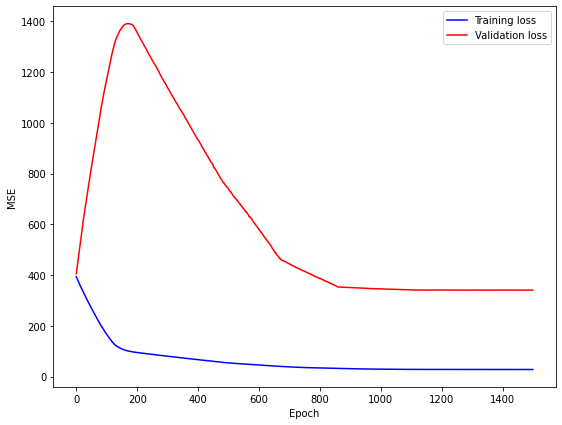

In [14]:
mse = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(mse))

plt.figure(figsize=(9, 7))
plt.plot(epochs, mse, 'r', label='Training loss', color='blue')
plt.plot(epochs, val_loss, 'r', label='Validation loss', color='red')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

In [15]:
# Preparing input for the model 
x = xtest[X.columns].values.astype('float32')
x = np.reshape(x, (1, X.shape[1]))

# Predicting 
model.predict(x)

array([[1406.2684]], dtype=float32)

In [16]:
# Extracting model weights
w = [x[0] for x in model.weights[0].numpy()]

In [17]:
dcoef = pd.DataFrame({'feature': X.columns, 'w': w})
dcoef.sort_values('w', inplace=True)

In [18]:
dcoef

,feature,w
98,weekday_6,-0.574763
23,is_cured-90-99Vyras,-0.510918
22,is_cured-90-99Moteris,-0.426986
101,is_quarantine,-0.411650
97,weekday_5,-0.356620
...,...,...
78,is_treated-20-29Vyras,0.747716
4,is_cured-10-19Vyras,0.754963
86,is_treated-60-69Vyras,0.761352
85,is_treated-60-69Moteris,0.787507
